In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
roi = 'A1'
filepath = 'drive/MyDrive/fMRI_music_data/%s_by_subject_sorted_conds/'%roi
subjects = ['03','15','20','23']
n_sub = len(subjects)

In [ ]:
# load in the data from all subjects
data = []
for subj in subjects: 
  data.append(np.load(filepath+'%s_sub-1%s.npy'%(roi,subj)))

# recast the list into an array and check the shape
data = np.asarray(data)
print(data.shape)

(4, 516, 1776)


First, I'll average over data over subjects to look at variability of data within and across runs.

In [ ]:
data_avg = np.average(data,axis=0)
print(data_avg.shape)

(516, 1776)


In [ ]:
pca = PCA(n_components=2) # only look at the first two PCs

data_avg_2PCs = pca.fit_transform(data_avg.T)
print(data_avg_2PCs.shape)

(1776, 2)


Now I'll visualize the change in these two components over time.

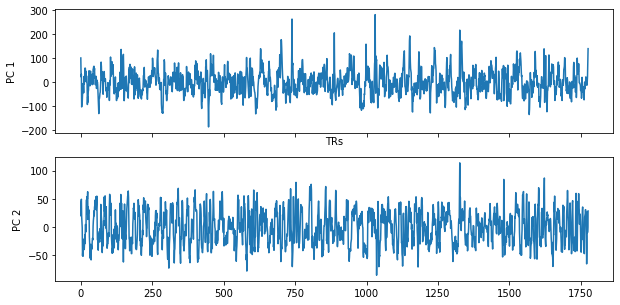

In [ ]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,5))
ax[0].plot(data_avg_2PCs[:,0])
ax[0].set_ylabel('PC 1')
ax[1].plot(data_avg_2PCs[:,1])
ax[1].set_ylabel('PC 2')
ax[0].set_xlabel('TRs');

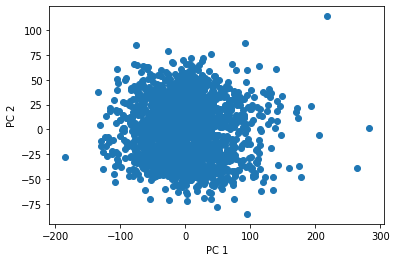

In [ ]:
plt.scatter(data_avg_2PCs[:,0],data_avg_2PCs[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2');

It seems that the time points are distributed pretty uniformly.

In [ ]:
total_TRs = data_avg.shape[1]

1776


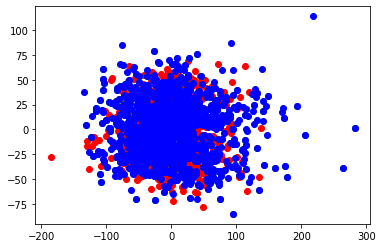

In [ ]:
fig,ax = plt.subplots()
ax.scatter(data_avg_2PCs[:total_TRs//3,0],data_avg_2PCs[:total_TRs//3,1],color='red')
ax.scatter(data_avg_2PCs[total_TRs//3:2*total_TRs//3,0],data_avg_2PCs[total_TRs//3:2*total_TRs//3,1],color='green')
ax.scatter(data_avg_2PCs[total_TRs//3:,0],data_avg_2PCs[total_TRs//3:,1],color='blue');

In [ ]:
print(pca.explained_variance_ratio_)

[0.15014279 0.05040027]


In [ ]:
pca = PCA()

data_avg_PC = pca.fit_transform(data_avg.T)
print(data_avg_PC.shape)

(1776, 516)


In [ ]:
print(pca.explained_variance_ratio_[:10])

[0.15014279 0.05040027 0.04768781 0.03646315 0.03354179 0.02771031
 0.02617612 0.02478808 0.02043681 0.01888299]


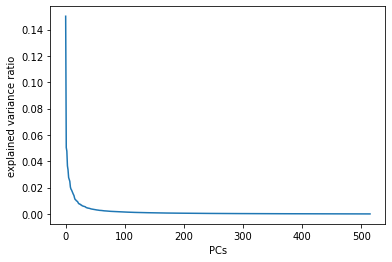

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('PCs')
plt.ylabel('explained variance ratio');

In this next analysis, I'll fit the PCA to the average over subjects and then transform each of the subjects individually.

In [ ]:
pca = PCA()
pca.fit(data_avg.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(data.shape)

(4, 516, 1776)


In [ ]:
data[0,:,:].T

(1776, 516)

In [ ]:
subj_PCs = []
for i in range(n_sub):
  subj_PCs.append(pca.transform(data[i,:,:].T))

In [ ]:
subj_PCs = np.asarray(subj_PCs)
print(subj_PCs.shape)

(4, 1776, 516)
